<a href="https://colab.research.google.com/github/miguelsmachado/data_science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática 2.0**
*by [Miguel S. Machado](https://www.linkedin.com/in/miguel-s-machado/)*

---
  

# Analisando a Violência no Rio de Janeiro

As charges abaixo, apesar de muito realistas, não são motivo de orgulho algum para nenhum brasileiro:

<img src="https://github.com/miguelsmachado/data_science/blob/master/criminalidade_rj/089.jpg?raw=true" alt="drawing" width="500"/><img src="https://github.com/miguelsmachado/data_science/blob/master/criminalidade_rj/Charge-ironiza-situação-do-Rio.jpg?raw=true" alt="drawing" width="500"/>

Infelizmenete vivemos em uma socidade muito violenta, onde o número de crimes cometidos diariamente é muito grande.

Mais triste ainda é dizer que nosso país é uma "referência" quando o assunto é criminalidade. E ainda, temos como um "pólo" da violência um dos nossos maiores cartões postais do Brasil: o **Rio de Janeiro**.

Nosso objetivo aqui, é tentar entender melhor o que ocorre no Rio de Janeiro de uma forma estatistica. A intenção não é levantar discussões políticas e nem sociais, o resultado desse estudo é uma avalição dos dados da violência no Rio de Janeiro.

## Obtenção dos Dados


 Nossa base de dados foi feita através de informações da Polícia Militar do Estado do Rio de Janeiro. Com o intuíto de transparecer para todos as informações, qualquer um pode fazer uso dessa base de dados. Sinta-se a vontade para baixar também e fazer a sua análise!

  * Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
  * Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html

### Importando os dados

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/data_science/master/criminalidade_rj/violencia_rio.csv")

## Análise Inicial dos Dados

Em qualquer análise, o primeiro passo sempre é entender como estão estruturados os nosso dados:


### Visualização do DataFrame

Antes de tudo vamos dar uma olhada nas primeiras 5 linhas do nosso DataFrame:

In [120]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Como já pode ser visto, o DataFrame possui muitas variáveis e muitas delas não estão preenchidas.

Possivelmente esses valores precisarão ser tratados!

### Tamanho do DataFrame

In [121]:
print(f"O nosso DataFrame possui {df.shape[0]} entradas e {df.shape[1]} colunas")

O nosso DataFrame possui 344 entradas e 56 colunas


Como podemos ver o DataFrame não é tão grande assim. Será muito util para realizamos uma análise, porém estaria longe de gerar um modelo de Machine Learning confiável.

###Colunas do DataFrame

Exitem 56 variávies, vamos ver quais são elas:

In [122]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Analisando as variáveis podemos entender como funciona a estrutura dos dados. Temos as variáveis `vano` e `mês`, que nos situam no tempo. As outras variáveis contabilizam quantas ocorrências de cada tipo ocorreram naquele período.

###Tipos das variáveis

Aproveitando que estamos falando de variáveis, vamos ver o tipo de cada uma:

In [123]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

###Dados nulos

Vamos verificar a porcentagem de dados nulos em cada coluna:

In [124]:
round((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
 

roubo_bicicleta               80.0
furto_bicicleta               80.0
apreensao_drogas_sem_autor    52.0
posse_drogas                  52.0
apf                           52.0
aaapai                        52.0
cmp                           52.0
trafico_drogas                52.0
cmba                          52.0
sequestro_relampago           42.0
furto_coletivo                42.0
extorsao                      42.0
furto_celular                 42.0
roubo_apos_saque              42.0
roubo_conducao_saque          42.0
roubo_cx_eletronico           42.0
estupro                       42.0
estelionato                   42.0
pol_civis_mortos_serv         42.0
pol_militares_mortos_serv     42.0
pessoas_desaparecidas         38.0
encontro_ossada               38.0
roubo_celular                 31.0
lesao_corp_culposa            28.0
ameaca                        28.0
sequestro                     28.0
lesao_corp_morte              28.0
registro_ocorrencias          28.0
hom_por_interv_polic

## Informações Estatísticas da Violência no Rio de Janeiro

Como foi exibido anteriormente, o DataFrame possui 56 colunas. Uma análise completa ficaria muito extensa e provavelmente você fecharia essa aba do seu navegador antes de terminar a leitura.

Vamos escolher algumas variáveis e usando o poder do Data Science e do Pandas fazer algumas análises!


###Análise descritiva dos dados





In [125]:
df.describe().round(2)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.00,344.00,344.00,248.00,344.00,260.00,344.00,344.00,200.00,260.00,248.00,344.00,344.00,344.00,344.00,344.00,344.00,344.00,200.00,236.00,200.00,200.00,68.00,344.00,344.00,344.00,344.00,200.00,200.00,68.00,344.00,344.00,248.00,200.00,200.00,200.00,344.00,164.00,164.00,164.00,344.00,164.00,164.00,164.00,164.00,248.00,212.00,344.00,212.00,200.00,200.00,344.00,344.00,344.00,248.00,344.00
mean,2004.84,6.45,504.56,4.33,15.67,71.90,318.27,5492.80,369.94,212.12,3410.76,455.01,133.28,2448.70,340.32,3418.52,659.00,9.38,3.55,957.97,11.32,145.66,10.81,1211.22,9428.12,1674.67,1518.92,650.23,1449.18,124.81,5994.33,10433.18,0.67,133.26,7.76,2231.86,1071.93,609.24,759.15,186.15,1772.24,2319.59,568.63,1255.51,83.04,5530.33,435.13,66.26,3.30,2.08,0.34,577.69,4734.74,2448.70,53794.16,2.99
std,8.29,3.45,113.77,2.76,5.86,36.49,127.61,1514.22,94.39,54.23,776.16,119.77,44.32,789.69,223.86,2459.02,297.62,10.56,2.63,624.31,6.40,55.39,7.77,800.58,4578.01,294.85,971.85,268.84,368.64,80.25,1964.77,3696.73,0.96,43.30,5.09,772.09,643.38,246.31,312.87,36.22,656.76,650.52,248.04,357.04,62.95,1100.75,65.35,34.46,2.19,1.76,0.64,104.97,3204.05,789.69,11039.05,0.08
min,1991.00,1.00,272.00,0.00,2.00,10.00,122.00,2350.00,188.00,111.00,848.00,243.00,49.00,1097.00,59.00,688.00,281.00,0.00,0.00,0.00,1.00,11.00,0.00,81.00,3261.00,1159.00,322.00,23.00,484.00,0.00,2322.00,4691.00,0.00,23.00,0.00,717.00,80.00,248.00,262.00,114.00,729.00,1173.00,225.00,628.00,21.00,1409.00,236.00,0.00,0.00,0.00,0.00,334.00,1086.00,1097.00,30621.00,2.00
25%,1998.00,3.00,413.75,2.00,11.00,41.75,200.00,4067.00,282.00,176.00,3040.00,365.75,103.75,1889.75,208.25,1053.00,430.75,2.00,2.00,549.75,6.00,106.00,2.25,811.75,5107.75,1430.50,732.00,501.00,1297.00,3.75,3978.00,6700.25,0.00,109.75,4.75,1654.50,714.50,360.50,426.00,160.00,1276.75,1681.00,332.50,950.50,46.00,4868.50,390.00,42.00,2.00,1.00,0.00,500.00,1557.00,1889.75,45374.50,3.00
50%,2005.00,6.00,507.00,4.00,15.00,70.00,318.50,5830.50,384.00,203.00,3372.00,433.50,125.00,2322.00,285.50,2788.50,592.00,4.50,3.00,717.50,10.00,149.50,13.00,1154.00,9243.50,1637.50,1076.50,717.50,1492.50,158.00,6559.00,10448.50,0.00,132.50,7.00,2170.50,979.50,623.00,815.00,184.00,1755.00,2424.00,530.00,1259.00,58.00,5455.00,427.00,60.50,3.00,2.00,0.00,590.00,4190.00,2322.00,54926.50,3.00
75%,2012.00,9.00,577.25,6.00,19.00,96.25,398.25,6582.50,441.25,236.25,3733.50,536.25,151.25,2778.00,401.25,5385.25,784.00,14.00,5.00,1306.75,15.00,180.50,17.00,1635.00,11590.50,1833.25,2334.25,860.00,1731.25,181.50,7601.50,13877.50,1.00,152.25,11.00,2880.50,1546.00,763.50,1045.25,208.00,2202.00,2905.50,793.50,1515.25,93.00,6261.75,481.50,87.00,4.00,3.00,1.00,649.00,6872.75,2778.00,63292.50,3.00
max,2019.00,12.00,831.00,21.00,36.00,194.00,645.00,9050.00,561.00,449.00,6653.00,914.00,300.00,5358.00,1329.00,9669.00,1628.00,54.00,12.00,2626.00,37.00,283.00,26.00,3661.00,23203.00,2630.00,5368.00,1036.00,2215.00,243.00,9880.00,18003.00,5.00,271.00,31.00,3627.00,2543.00,1160.00,1282.00,289.00,3695.00,3425.00,1114.00,2314.00,350.00,9034.00,628.00,217.00,13.00,10.00,3.00,848.00,13833.00,5358.00,75403.00,3.00


Essa análise descritiva traz muita informação relevante.

Lembrando que podemos descosiderar as análises das colunas `vano`e `mes` pois seus dados não são quantitativos, e sim qualitativos.

Nas demais, podemos de uma forma bem rápida obter muitas informações:
* Na linha `count` podemos ver em quantos meses, dos 344 relacionados, ocorerram aquele tipo de crime;
* Na linha `mean` temos a informação de qual foi a média de ocorrencias por mês (contando somente os meses que ocorerram;
* O desvio padrão também pode ser visto na linha `std`, que mostra a dispersão que os resultados tiveram (também contando somente os meses em que ocorerram aquele tipo de ocorrência;
* Temos fácil acesso também os valores de `min` e `max`, ou seja, qual foi a menor e a maior quantidade de vezes que houve aquela ocorrência em um mês;
* E nas porcentagem, vemos como está distribuído os valores. Uma atenção maior deve ser dada a `mediana` que é onde se encontram `50%` dos valores. Em muitos casos ele tráz mais significado que a própria média, pois está ultima pode sofrer sérias alterações com outliers.
* Uma boa forma de vermos se existem outliers em nosso DataFrame é compararmos a média com a mediana. Uma diferença muito grande entre essas informações é um forte indício de outliers.

Vamos fazer essa comparação de média e mediana:

In [126]:
df_mean_median = df.describe().round(2)
df_mean_median.loc[['mean', '50%']]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
mean,2004.84,6.45,504.56,4.33,15.67,71.9,318.27,5492.8,369.94,212.12,3410.76,455.01,133.28,2448.7,340.32,3418.52,659.0,9.38,3.55,957.97,11.32,145.66,10.81,1211.22,9428.12,1674.67,1518.92,650.23,1449.18,124.81,5994.33,10433.18,0.67,133.26,7.76,2231.86,1071.93,609.24,759.15,186.15,1772.24,2319.59,568.63,1255.51,83.04,5530.33,435.13,66.26,3.3,2.08,0.34,577.69,4734.74,2448.7,53794.16,2.99
50%,2005.00,6.00,507.00,4.00,15.00,70.0,318.50,5830.5,384.00,203.00,3372.00,433.50,125.00,2322.0,285.50,2788.50,592.0,4.50,3.00,717.50,10.00,149.50,13.00,1154.00,9243.50,1637.50,1076.50,717.50,1492.50,158.00,6559.00,10448.50,0.00,132.50,7.00,2170.50,979.50,623.00,815.00,184.00,1755.00,2424.00,530.00,1259.00,58.00,5455.00,427.00,60.50,3.0,2.00,0.00,590.00,4190.00,2322.0,54926.50,3.00


Nessa rápida avaliação podemos ver que nosso DataFrame, em princípio, não possui grandes problemas com outliers.

###Calculando algumas médias

Agora vamos calcular a média (por mês) de alguns dos principais crimes:

  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
  

In [127]:
print(f"A média de roubo de veículos entre 1991 e 2019 foi de {round(df.roubo_veiculo.mean(), 2)} veículos por mês.")
print(f"Já a média de furto de veículos foi de {round(df.furto_veiculos.mean(), 2)} veículos por mês.")
print(f"Mas temos notícias boas também! Por mês, foram recuperados {round(df.recuperacao_veiculos.mean(), 2)} veículos por mês.")

A média de roubo de veículos entre 1991 e 2019 foi de 2448.7 veículos por mês.
Já a média de furto de veículos foi de 1674.67 veículos por mês.
Mas temos notícias boas também! Por mês, foram recuperados 1772.24 veículos por mês.


###Gerando informação nova

Vamos usar as informações que ja temos e extrair informações não disponíveis no DataFrame.

Usando as informções de `roubo_veiculo`, `furto_veiculos` e `recuperacao_veiculos`, vamos calcular o percentual de veiculos recuperados.

In [0]:
for index, row in df.iterrows():
  df.loc[index, 'percentual_veiculos_rec'] = round((row.recuperacao_veiculos/(row.furto_veiculos+row.roubo_veiculo))*100, 2)

In [129]:
df[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos' ,'percentual_veiculos_rec']].head()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos,percentual_veiculos_rec
0,1174,2009,872,27.40
1,1097,1850,751,25.48
2,1265,2084,789,23.56
3,1415,2085,787,22.49
4,1449,2185,845,23.25


E para finalizar essa análise, podemos fazer um calculo geral do percentual de carros recuperados:

In [130]:
total = round((df.recuperacao_veiculos.sum()/(df.furto_veiculos.sum()+df.roubo_veiculo.sum()))*100, 2)
print(f"Utilizando todos os dados do DataFrame, obtivemos o seguinte percentual de veículos recuperados: {total} %")

Utilizando todos os dados do DataFrame, obtivemos o seguinte percentual de veículos recuperados: 42.98 %


### Mínimos e máximos

Vamos verficar qual foi o menor e o maior número de casos, em um mês, de homicidios dolosos:

In [131]:
print(f"Com relação ao número de homicídios dolosos, o mês em que ocorerram menos casos, ocorreram {df.hom_doloso.min()}.")
print(f"Já o mês que mais ocorerram, foram {df.hom_doloso.max()} casos.")

Com relação ao número de homicídios dolosos, o mês em que ocorerram menos casos, ocorreram 272.
Já o mês que mais ocorerram, foram 831 casos.


## Visualização de Dados

Outra forma de visualizar informações é a forma gráfica.

A visualização de dados pode nos oferecer um experiência completamente diferente da análise com números e tabelas. As vezes um gráfico não traz a precisão da informação, mas pode um estalar de dedos exibir um contexto todo.

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


###Distribuição de Homicídios Dolosos

Antes, na analise descritiva, poderiamos avaliar os percentis da variável e "imaginar" como era sua distribuição.

Com um gráfico, não teremos a medida exata dos percentis, mas só de olhar já veremos se a distribuição está simétrica e bem distribuída.

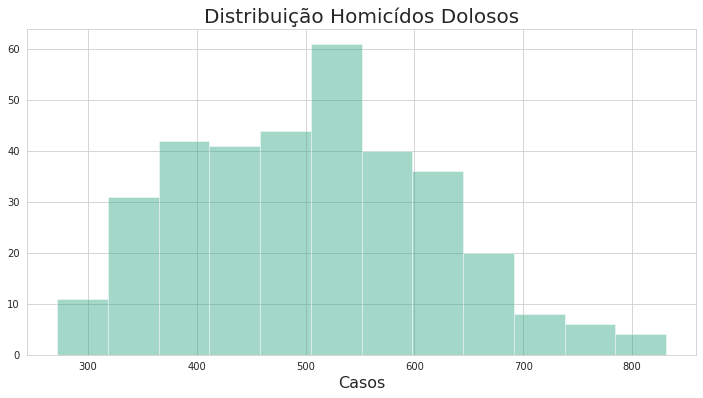

In [132]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")
ax = sns.distplot(df.hom_doloso, kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição Homicídos Dolosos", fontsize=20)
ax.set_xlabel('Casos', fontsize=16);

Como podemos observar, a distribuição não é simétrica.

Existe uma repetição de mais de 60x de um número por volta de 525 casos por mês.

Além de que, podemos observar a tendencia dos dados a ficar na primeira metade da imagem, por volta de 450 casos por mês.

###Numero de roubo em coletivos com o passar dos anos

Para finalizar nossa análise gráfica, vamos vericar qual o comportamento do número de roubos em coletivos com o passar dos anos.

In [0]:
# Criando a coluna mes_ano
for index, row in df.iterrows():
  df.loc[index, 'mes-ano'] = str(int(row.vano)) + "-" + str(int(row.mes))

# Colocando a coluna 'mes-ano' com index
df.set_index('mes-ano', inplace=True)

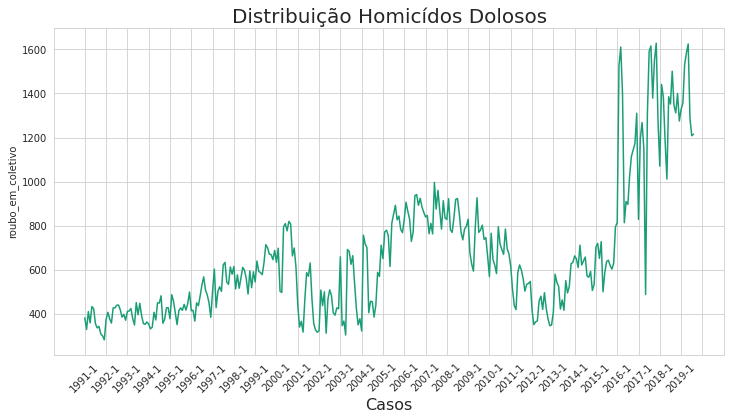

In [134]:
ax = sns.lineplot(data=df, x=df.index, y='roubo_em_coletivo')
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição Homicídos Dolosos", fontsize=20)
ax.set_xlabel('Casos', fontsize=16);
ax.set_xticks([i * 12for i in range(30)])
plt.setp(ax.get_xticklabels(), rotation=45);

## Conclusão

Chegamos ao final desse estudo com uma mensagem muito boa e outra muito ruim.

Infelizmente, os números da criminalidade vem em uma crescente no Rio de Janeiro, poluindo um dos maiores cartões postais do Brasil.

Por exemplo, na análise descritiva vimos que a média de 370 estupros por mês, por exemplo, o que é muito triste e preocupante. E durante a análise gráfica, nos foi mostrado que o número de roubos em coletivos vem aumentando com o passar dos anos.

Ou seja, os moradores do Rio de Janeiro estão vivendo em um ambiente onde a criminalidade é elevada e crescente.

Por outro lado, tivemos uma pequena amostra do poder do Data Science. A capacidade que temos, com poucas linhas de programação, de entender um ambiente que no ínicio parece complexo, mas no final se mostra muito intrigante e convidativo!

Para acompanhar outros artigos sobre programação e Data Science, procure no meu [Linkdin](https://www.linkedin.com/in/miguel-s-machado/), ou no [GitHub](https://github.com/miguelsmachado/py_projects/blob/master/README.md) ou no [Medium](https://medium.com/@miguelsmachado).

Obrigado pela atenção! Até a próxima!